In [1]:
from os.path import exists as exists
import pandas as pd  
import numpy as np
from math import sqrt
import math 

In [2]:
RULES = [1,2]
ENLACES = [1,2,4,8,16,32]
EXPERIMENTOS = list(range(1,11))
PATH_PLOT_ENTROPY = "plot_files\\entropy\\entropy.csv"
PATH_DATA = "data_critical_threshold\\degree_distributions\\"

In [3]:
def save_csv(data_df, path_file):
    print("Save: ", path_file)
    data_df.to_csv(path_file, sep=',',encoding='utf-8')

# Obtiene datos de distribicion de grado

In [4]:
#Recibe la distribucion de grado
def shannon_entropy(Pk):
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [12]:
def get_df_dd():
    data = dict()
    for rule in RULES:
        data[rule] = dict() 
        for experimento in EXPERIMENTOS:
            data[rule][experimento] = dict()
            for enlace in ENLACES:
                p_deg_dist = PATH_DATA + 'r' + str(rule) + "_enlaceD" + str(enlace) + "_experimento" + str(experimento) + "_ciclo30_dist_degree.csv"
                if exists(p_deg_dist):
                    print("Existe: ", p_deg_dist)
                    data[rule][experimento][enlace] = dict()
                    df_data = pd.read_csv(p_deg_dist,sep=";")[['bins','d']]
                    #critical threshold  
                    # bins - grado
                    # d la cantidad de nodos con ese grado
                    #print("Nodos ", str(df_data['d'].sum()))
                    df_data['k_sum'] = df_data['bins'] * df_data['d']
                    df_data['k2'] = df_data['bins'] * df_data['bins']
                    df_data['k2_sum'] = df_data['k2'] * df_data['d']
                    df_data['p'] = df_data['d'] / 2500 
                    #entropy
                    df_data['ln_k'] = np.log2(df_data['bins'])
                    df_data['ln_k_sum'] = df_data['d'] * df_data['ln_k']
                    df_data.replace([np.inf, -np.inf], 0, inplace=True)
                    df_data = df_data.fillna(0)
                    #print(df_data)
                    #critical threshold  
                    # http://networksciencebook.com/chapter/8#robustness - Critical Threshold (8.7)
                    k_prom = df_data['k_sum'].sum() / 2500
                    k2_prom = df_data['k2_sum'].sum() / 2500
                    fc = 1-(1 / ((k2_prom/k_prom)-1))
                    #print(k_prom)
                    #print(k2_prom)
                    #print('fc= ',fc)
                    #entropy shannon
                    ln_k_sum = df_data['ln_k_sum'].sum()
                    h = ln_k_sum/(2500*np.log(2499))
                    #print('h= ',h)
                    #entropy fisher
                    #print("comprueba densidad ", str(df_data['p'].sum()))
                    p = list(df_data['p'])
                    i = len(p) - 1
                    F_sum = [(sqrt(p[x+1])-sqrt(p[x]))**2 for  x in range(i-1)]
                    print(sum(F_sum))
                    F = sum(F_sum)*4
                    #print('i=',str(i),"=",str(len(F_sum)))
                    #print("p=",p)
                    #print("F_sum=",F_sum)
                    #print("F=", F)
                    data[rule][experimento][enlace]['fc'] = fc
                    data[rule][experimento][enlace]['h'] = h
                    data[rule][experimento][enlace]['s'] = shannon_entropy(p)
                    data[rule][experimento][enlace]['F'] = F
                else:
                    print("No existe: ", p_deg_dist)
    return data

Plots files para calcular metricas

In [13]:
df_dd = get_df_dd()
print(df_dd)

No existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento1_ciclo30_dist_degree.csv
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD2_experimento1_ciclo30_dist_degree.csv
0.44326895017295675
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento1_ciclo30_dist_degree.csv
0.3116259341627256
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD8_experimento1_ciclo30_dist_degree.csv
0.13201218892293642
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD16_experimento1_ciclo30_dist_degree.csv
0.12812604235175587
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento1_ciclo30_dist_degree.csv
0.10375955947359308
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento2_ciclo30_dist_degree.csv
0.41626456014665547
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD2_experimento2_ciclo30_dist_degree.csv
0.45245212221834574
Existe:  data_critical_threshold

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

0.11719709798834604
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento3_ciclo30_dist_degree.csv
0.1027485053232427
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento4_ciclo30_dist_degree.csv
0.4316968566983679
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD2_experimento4_ciclo30_dist_degree.csv
0.4610902300924335
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento4_ciclo30_dist_degree.csv
0.3076741958964661
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD8_experimento4_ciclo30_dist_degree.csv
0.13655213679569053
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD16_experimento4_ciclo30_dist_degree.csv
0.1298420785530752
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento4_ciclo30_dist_degree.csv
0.10117656107034301
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento5_ciclo30_dist_degree.csv
0.4664142097618317

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

0.43090861446447937
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento6_ciclo30_dist_degree.csv
0.32140492006058385
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD8_experimento6_ciclo30_dist_degree.csv
0.1343019667824028
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD16_experimento6_ciclo30_dist_degree.csv
0.12650244059504706
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento6_ciclo30_dist_degree.csv
0.10456583071075207
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento7_ciclo30_dist_degree.csv
0.44101151579309605
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD2_experimento7_ciclo30_dist_degree.csv
0.43713275546772623
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento7_ciclo30_dist_degree.csv
0.30766223515354185
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD8_experimento7_ciclo30_dist_degree.csv
0.1371715044624

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

0.1325300200190096
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento8_ciclo30_dist_degree.csv
0.10254847335576261
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento9_ciclo30_dist_degree.csv
0.4448807472481938
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD2_experimento9_ciclo30_dist_degree.csv
0.4201535808350112
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento9_ciclo30_dist_degree.csv
0.3168906305698314
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD8_experimento9_ciclo30_dist_degree.csv
0.13568042997384244
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD16_experimento9_ciclo30_dist_degree.csv
0.1268305105356481
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento9_ciclo30_dist_degree.csv
0.10491915071579269
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento10_ciclo30_dist_degree.csv
0.445658895576505

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

0.20051474349172033
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento1_ciclo30_dist_degree.csv
0.15898701454358427
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD16_experimento1_ciclo30_dist_degree.csv
0.11673120685697388
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD32_experimento1_ciclo30_dist_degree.csv
0.22922130448271338
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD1_experimento2_ciclo30_dist_degree.csv
0.13228751273591616
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD2_experimento2_ciclo30_dist_degree.csv
0.15974697088373174
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento2_ciclo30_dist_degree.csv
0.19880113572534144
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento2_ciclo30_dist_degree.csv
0.15014285515858036
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD16_experimento2_ciclo30_dist_degree.csv
0.12041624425

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento6_ciclo30_dist_degree.csv
0.207587325746171
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento6_ciclo30_dist_degree.csv
0.1620398967927914
No existe:  data_critical_threshold\degree_distributions\r2_enlaceD16_experimento6_ciclo30_dist_degree.csv
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD32_experimento6_ciclo30_dist_degree.csv
0.23520492602011103
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD1_experimento7_ciclo30_dist_degree.csv
0.12858420229020975
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD2_experimento7_ciclo30_dist_degree.csv
0.15660081953777802
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento7_ciclo30_dist_degree.csv
0.19486209629982792
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento7_ciclo30_dist_degree.csv
0.1612040613062376
Existe:  data_critical_threshold\de

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

0.18838052537412792
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento8_ciclo30_dist_degree.csv
0.1581809930128664
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD16_experimento8_ciclo30_dist_degree.csv
0.11740837999825048
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD32_experimento8_ciclo30_dist_degree.csv
0.25233832328762645
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD1_experimento9_ciclo30_dist_degree.csv
0.13994282570759348
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD2_experimento9_ciclo30_dist_degree.csv
0.14017291006195723
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento9_ciclo30_dist_degree.csv
0.20448673557956998
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD8_experimento9_ciclo30_dist_degree.csv
0.1647916138112706
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD16_experimento9_ciclo30_dist_degree.csv
0.1129234358450

C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netmetrics\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\snake\anaconda3\envs\netme

In [14]:
print(df_dd[1][1][2])

{'fc': 0.8977737392094502, 'h': 0.3650895876907394, 's': 2.652127653769154, 'F': 1.773075800691827}


In [15]:
results=dict()
if not exists(PATH_PLOT_ENTROPY):
    for r in RULES:
            #print(p_results)
            df_list = list()
            for e in EXPERIMENTOS:
                if e in df_dd[r].keys():
                    df = df_dd[r][e]
                    df_data = pd.DataFrame.from_dict(df).T
                    df_data['experimento'] = e
                    if not df_data.empty:
                        df_list.append(df_data)
            df_entropy = pd.concat(df_list)
            df_entropy.reset_index(inplace=True)
            df_entropy = df_entropy.rename(columns = {'index':'l_max'})
            #print(df_entropy)
            results['F_mean_r'+str(r)] = df_entropy.groupby('l_max')['F'].mean()
            results['F_std_r'+str(r)] = df_entropy.groupby('l_max')['F'].std()
            results['H_mean_r'+str(r)] = df_entropy.groupby('l_max')['h'].mean()
            results['H_std_r'+str(r)] = df_entropy.groupby('l_max')['h'].std()
            results['S_mean_r'+str(r)] = df_entropy.groupby('l_max')['s'].mean()
            results['S_std_r'+str(r)] = df_entropy.groupby('l_max')['s'].std()
            results['CT_mean_r'+str(r)] = df_entropy.groupby('l_max')['fc'].mean()
            results['CT_std_r'+str(r)] = df_entropy.groupby('l_max')['fc'].std()
    pd_results = pd.DataFrame(results)
    pd_results.index.name = 'l_max'
    pd_results = pd_results.sort_values(by=['l_max'],ascending=False)
    print(pd_results)
    save_csv(pd_results, PATH_PLOT_ENTROPY)
else:
    print('Ya existe ', PATH_PLOT_ENTROPY)

Ya existe  plot_files\entropy\entropy.csv


In [9]:
print("Critical threshols - Molly-Reed criterion")
plt.scatter(pd_results.index, pd_results["CT_mean_r1"]) #blue
plt.scatter(pd_results.index, pd_results["CT_mean_r2"]) #orange
plt.show()

Critical threshols - Molly-Reed criterion


NameError: name 'plt' is not defined

In [ ]:
print("Shannon entropy-paper Istambul")
plt.scatter(pd_results.index, pd_results["H_mean_r1"]) 
plt.scatter(pd_results.index, pd_results["H_mean_r2"])
plt.show()

In [ ]:
print("Fisher entropy - paper Istambul")
plt.scatter(pd_results.index, pd_results["F_mean_r1"]) 
plt.scatter(pd_results.index, pd_results["F_mean_r2"])
plt.show()

In [10]:
print("Shannon entropy - stackoverflow")
plt.scatter(pd_results.index, pd_results["S_mean_r1"]) 
plt.scatter(pd_results.index, pd_results["S_mean_r2"])
plt.show()

Shannon entropy - stackoverflow


NameError: name 'plt' is not defined

# Pruebas con Networkx

[0.     0.     0.0016 0.0768 0.9216]
0.4077843781648296


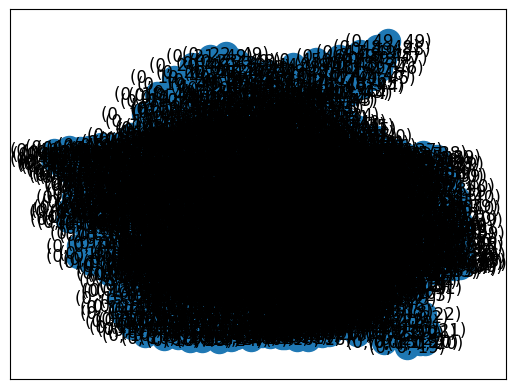

In [108]:
import matplotlib.pyplot as plt
import networkx as nx

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    
    return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    print(Pk)
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

G = nx.grid_graph(dim=(50, 50, 1))
nx.draw_networkx(G)
H = shannon_entropy(G)
print(H)